In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline



##importing csv

In [2]:
d = pd.read_csv('https://raw.githubusercontent.com/sirenita667/DSatGA_project/master/imls.csv')
d.head(2)

,Log Number,Institution,Program,Program Type,Project Title,Project Type,Award Date,Address,Address 2,Address 3,...,County Code,Census Tract,Census Block,MCD Code,Place Code,CBSA Code,MSAD Code,Description,Location,Organizational Unit Location
0,MG-00-14-0077-14,Exploratorium,National Leadership Grants - Museums,MG,Maker/STEM Education Support for 21st Century ...,NLGMuseums-Out of Cycle,09/26/2014 12:00:00 AM,Pier 15/17,NaN,NaN,...,75,61100,1011,92790,67000,41860,41884,NaN,"Pier 15/17\nSan Francisco, CA 94111-1456\n",NaN
1,LG-00-14-0179-14,Digital Public Library of America (DPLA),National Leadership Grants,LG,"Completing the Map: Extending, Streamlining, a...",NaN,09/16/2014 12:00:00 AM,c/o Boston Public Library,700 Boylston St.,NaN,...,25,10702,1005,7000,7000,14460,14454,The Digital Public Library of America will ext...,"c/o Boston Public Library\nBoston, MA 02116\n",NaN


##importing stopwords

In [3]:
#must install stop-words to use this.  in command prompt, type "pip install stop-words" + ENTER
#see more at https://pypi.python.org/pypi/stop-words

from stop_words import get_stop_words as stop

stoop = stop('english')
sw = set(stoop)



##treating d['Project Title'] with stopwords

In [4]:
title = d['Project Title']

In [5]:
t = []

for i, j in enumerate(title):
    try:
        if np.isnan(j):
            t.append(j)
        else:
            t.append(j.split())
    except:
        t.append(j.split())

In [6]:
tt = []

for i, j in enumerate(t):
    try:
        if np.isnan(j):
            tt.append(j)
        else:
            tt.append(list(set(t[i])-set(sw)))
    except:
        tt.append(list(set(t[i])-set(sw)))

In [7]:
ttt= []

for i, j in enumerate(tt):
    try:
        if np.isnan(j):
            pass
        else:
            ttt += tt[i]
    except:
        ttt += tt[i]

##counting

In [8]:
from collections import Counter
from operator import itemgetter


cc = Counter(ttt)
cc = sorted(cc.items(), reverse = True, key =itemgetter(1,0))

##adding titleList as new columns in d

In [9]:

d['titleList'] = pd.Series(tt)

In [10]:
list(d)


#while descList contains more keywords overall, 
#it populates less records than titleList which 
#has (assumably) every record populated.  test to see.

['Log Number',
 'Institution',
 'Program',
 'Program Type',
 'Project Title',
 'Project Type',
 'Award Date',
 'Address',
 'Address 2',
 'Address 3',
 'City',
 'State',
 'Zip Code',
 'Total Amount Originally Awarded',
 'Total Amount Awarded and Disbursed',
 'Applicant Matching Amount',
 'Requested Award Amount',
 'Requested Matching Amount',
 'Title of Principal Investigator',
 'First Name',
 'Last Name',
 'Organization Type',
 'Fiscal Year',
 'Award Period From',
 'Award Period To',
 'Organizational Unit',
 'County Code',
 'Census Tract',
 'Census Block',
 'MCD Code',
 'Place Code',
 'CBSA Code',
 'MSAD Code',
 'Description',
 'Location',
 'Organizational Unit Location',
 'titleList']

In [11]:
m = []

for i in enumerate(d.titleList):
    try:
        if np.isnan(d.titleList):
            print d[i]
    except:
        m.append('nothing')
        
set(m)


#proves that all records have a title, which makes it more consistent than using description (d.descList)

{'nothing'}

##searching by keywords "museum" or "library"

In [12]:
 #find any form of museum or library with capital or lowercase, or plural...

import re

useum = []
useumDum = []

for f in d.titleList:    
    if re.search("useum", str(f)):
        useum.append(f)
        useumDum.append(1)
    else:
        useum.append(0)
        useumDum.append(0)
        

print useum[0:100]
print useumDum[0:100]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ['Libraries', 'Natural', 'Poetry', 'Museums', 'Through', 'Discovering', 'World', 'History'], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ['Disaster', 'Recovery', 'File>Save:', 'Museums', "Diego's", 'Digital', 'Prevention', 'San'], 0, 0, 0, ['Building', 'Practicing', 'Network', "Children's", 'Museum', '2:', 'Research', 'Field', 'Agenda', 'Phase'], 0, 0, 0, ['Integrating', 'Museum', 'Mission', 'Money,', 'Food,', 'Cafes:'], 0, 0, 0, ['Engage', 'Norman', "Rockwell's", 'Multimedia', '-', "Museum's", 'Experiences', 'Audiences', 'Rockwell', 'World', 'Digital', 'Collections', 'Interactive'], 0, 0, 0, 0, 0, 0, ['Mansion', 'Environmental', 'Museum', 'Improvements', 'Maymont'], 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [13]:
ibrar = []
ibrarDum = []

for f in d.titleList:    
    if re.search("ibrar", str(f)):
        ibrar.append(f)
        ibrarDum.append(1)
    else:
        ibrar.append(0)
        ibrarDum.append(0)
        

print ibrar[0:100]
print ibrarDum[0:100]

[0, 0, 0, 0, 0, 0, 0, 0, ['Involved:', 'Get', 'Your', 'Library', 'Powered'], ['Librarians', 'School', 'Advancing', 'Learning', 'STEM'], 0, 0, 0, 0, 0, 0, 0, ['Possibilities', 'Libraries', 'Services', 'Veterans:', 'Identifying'], 0, ['Making:', 'Content', 'Makerspaces', 'Library', 'Zine', 'Academic', 'Critical'], 0, 0, 0, 0, 0, 0, 0, 0, ['Libraries', 'Age', 'Engagement', 'Community', 'Digital'], 0, 0, ['Libraries', 'Natural', 'Poetry', 'Museums', 'Through', 'Discovering', 'World', 'History'], ['Gaming', '21st', 'GOAL21', 'Century', 'Opportunities', 'Libraries', 'Academic'], 0, 0, ['Community', 'Rancheria', 'Graton', 'Library'], ['Intergenerational', 'STEAM', 'Library', 'Jawn:', 'Initiative', 'An', 'Maker'], ['Advisory', 'Whole', 'Library', 'Growing', 'Readers:', 'Readers???', 'Community', 'Services', 'Providing', 'Approach'], ['Development', 'Case', 'Business', 'Appalachian', 'Study', 'Libraries', 'Economic', 'A', 'Rural', 'Small', 'Region:', 'The', 'Public', 'Role'], 0, ['Project', 'CM

##adding features to d (from original string-form)

In [14]:
aa = d['Total Amount Awarded and Disbursed']

for a in aa:
    aa = aa.replace(a, float(a.replace('$', "")))
print aa[0:4]

0    750000
1    999485
2    275000
3    698606
Name: Total Amount Awarded and Disbursed, dtype: float64


In [15]:
from datetime import datetime

#09/26/2014 12:00:00 AM



bb = []

for b in d['Award Date']:
    try:
        if np.isnan(b):
            bb.append(b)
        else:
            bb.append(datetime.strptime(b, '%m/%d/%Y %I:%M:%S %p'))
    except:
        bb.append(datetime.strptime(b, '%m/%d/%Y %I:%M:%S %p'))
        
print len(aa)
print bb[0:4]
print len(bb)
print len(d)

13594
[datetime.datetime(2014, 9, 26, 0, 0), datetime.datetime(2014, 9, 16, 0, 0), datetime.datetime(2014, 9, 12, 0, 0), datetime.datetime(2014, 9, 12, 0, 0)]
13594
13594


In [16]:
d['totAward_float'] = pd.Series(aa)
d['date_asTime'] = pd.Series(bb)
d['museum_dummies'] = pd.Series(useumDum)
d['library_dummies'] = pd.Series(ibrarDum)
d['date_delta'] = (d.date_asTime - d.date_asTime.min())/np.timedelta64(1, 'D')

In [17]:
(d.date_asTime.max() - d.date_asTime.min())/np.timedelta64(1, 'D')

6757.0

In [18]:
#taking out records were d.date_asTime are NaN

d1 = d[~pd.isnull(d.date_asTime)]

print(len(d), len(d1))

(13594, 13581)


##plotting by "museum"-like keywords

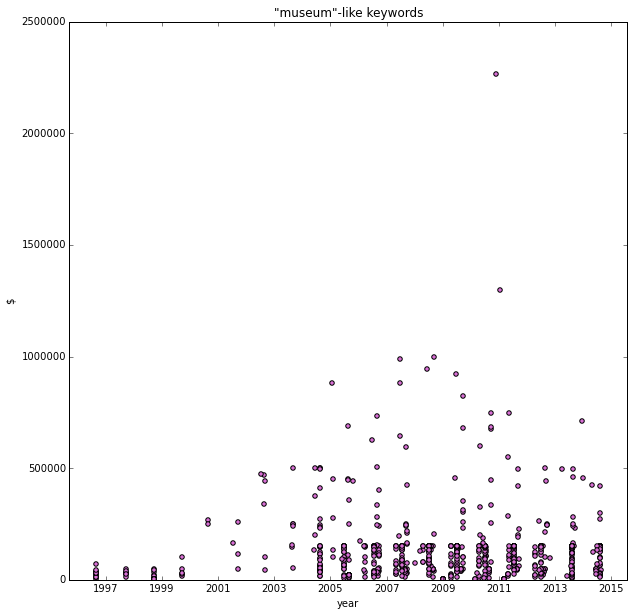

In [19]:


xM = (d1[(d1.museum_dummies==1)].date_asTime).reshape(737, 1)
yM = (d1[(d1.museum_dummies==1)].totAward_float).reshape(737, 1)

plt.figure(figsize = (10,10))
plt.scatter(xM, yM, c='orchid')
plt.ylim(ymin= 0)
plt.xlabel('year')
plt.ylabel('$')
plt.title('"museum"-like keywords')


In [20]:
len(d1[(d1.library_dummies==1)].date_asTime)

590

##plotting by "library"-like keywords

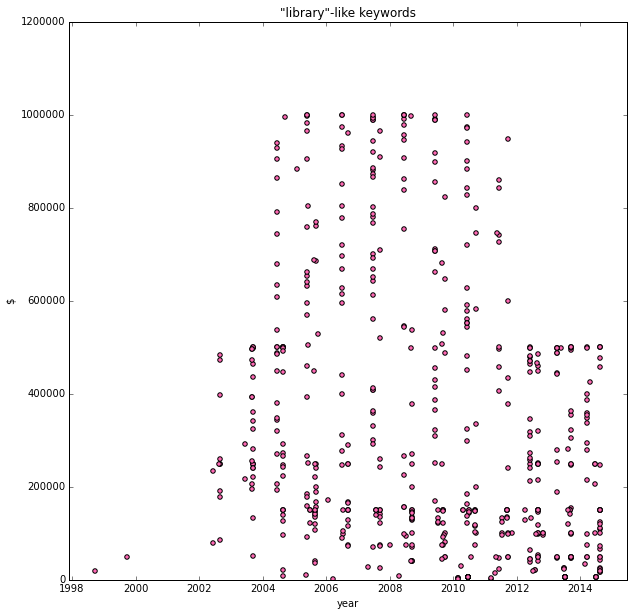

In [21]:


xL = (d1[(d1.library_dummies==1)].date_asTime).reshape(590, 1)
yL = (d1[(d1.library_dummies==1)].totAward_float).reshape(590, 1)

plt.figure(figsize = (10,10))
plt.scatter(xL, yL, c='hotpink')
plt.ylim(ymin= 0)
plt.xlabel('year')
plt.ylabel('$')
plt.title('"library"-like keywords')


In [22]:
xL.shape, yL.shape

((590L, 1L), (590L, 1L))

##finding sums for keywords over time and plotting with  linear regression-line

In [23]:
from sklearn import linear_model



rgr = linear_model.LinearRegression()



In [24]:
dMuseum = d1[(d1.museum_dummies==1)][['date_asTime', 'date_delta', 'totAward_float']].sort(['date_asTime'])




len(dMuseum)
dMuseum.head()

,date_asTime,date_delta,totAward_float
13322,1996-08-22,148,43150
13300,1996-08-22,148,31330
13301,1996-08-22,148,32902
13302,1996-08-22,148,30500
13303,1996-08-22,148,3500


In [25]:
dateSet = list(set(dMuseum['date_asTime']))
len(dateSet)


120

In [26]:
museumAwardSums = []

for i in dateSet:
    museumAwardSums.append(sum(dMuseum[(dMuseum.date_asTime == i)]['totAward_float']))


Museum-sum coefficient [ 19.13858198]
Museum-sum intercept 733033.660644


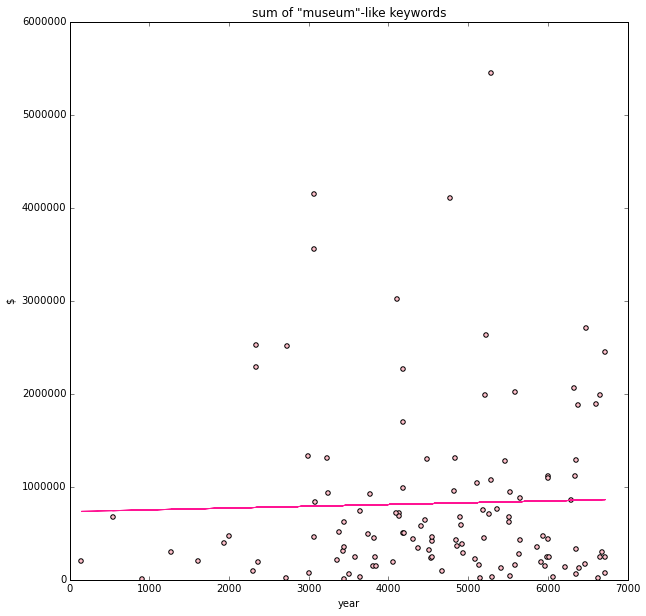

In [27]:
#museumAwardSums is the sum of awards for each date (y), only for records that contain "museum"-like keywords
#dateSet is the dates (x).  both are length 120.  plot please.


xM1 = np.array(list(set(dMuseum.date_delta))).reshape(120,1)
yM1 = np.array(museumAwardSums)

rgrM1 = rgr
rgrM1.fit(xM1, yM1)

print("Museum-sum coefficient {}".format(rgrM1.coef_))
print("Museum-sum intercept {}".format(rgrM1.intercept_))

plt.figure(figsize = (10,10))
plt.scatter(xM1,yM1, c='pink')
plt.plot(xM1, rgrM1.predict(xM1), c = 'deeppink')
plt.xlim(xmin = 0, xmax = 7000)
plt.ylim(ymin = 0)
plt.xlabel('year')
plt.ylabel('$')
plt.title('sum of "museum"-like keywords')

#omfg i did it.


### sum award amounts for "library"

In [28]:
dLib = d1[(d1.library_dummies==1)][['date_asTime', 'date_delta', 'totAward_float']].sort(['date_asTime'])




print len(dLib)


590


In [29]:
dateSet = list(set(dLib['date_asTime']))
len(dateSet)

100

In [30]:
libAwardSums = []

for i in dateSet:
    libAwardSums.append(sum(dLib[(dLib.date_asTime == i)]['totAward_float']))

Library-sum coefficient [ 403.39744378]
Library-sum intercept 65337.0277025


(0, 23000000.0)

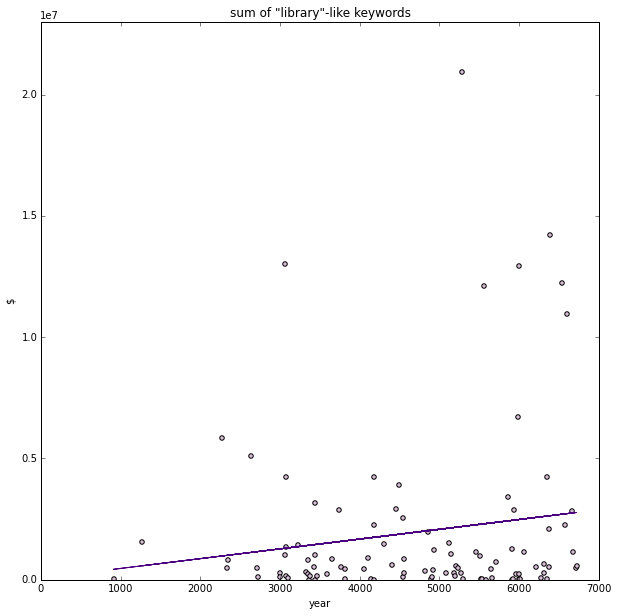

In [31]:
xL1 = np.array(list(set(dLib.date_delta))).reshape(100,1)
yL1 = np.array(libAwardSums)

rgrL1 = rgr
rgrL1.fit(xL1, yL1)

print("Library-sum coefficient {}".format(rgrL1.coef_))
print("Library-sum intercept {}".format(rgrL1.intercept_))


plt.figure(figsize = (10,10))
plt.scatter(xL1,yL1, c='thistle')
plt.plot(xL1, rgrL1.predict(xL1), c = 'indigo')
plt.xlabel('year')
plt.ylabel('$')
plt.title('sum of "library"-like keywords')
plt.xlim(xmin = 0, xmax = 7000)
plt.ylim(ymin = 0, ymax = 2.3E7)


###repeating with "history"-like keywords

In [32]:
# "histor-" keyword

historDum = []

for f in d.titleList:
    if re.search("histor", str(f)):
        historDum.append(1)
    elif re.search("Histor", str(f)):
        historDum.append(1)
    else:
        historDum.append(0)

print len(historDum), set(historDum)

13594 set([0, 1])


In [33]:
d2 = d

In [34]:
d2['histor'] = historDum

d2 = d2[~pd.isnull(d2.date_asTime)]

print(len(d), len(d2))

(13594, 13581)


In [35]:
len(d2[d2.histor ==1])

300

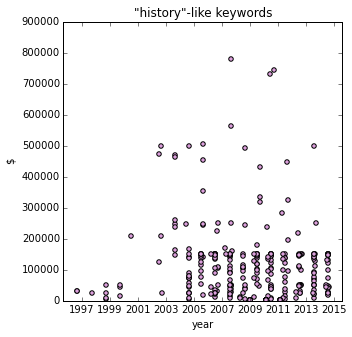

In [36]:
xH = (d2[(d2.histor==1)].date_asTime).reshape(300, 1)
xH2 = (d2[(d2.histor==1)].date_delta).reshape(300, 1)  #for later
yH = (d2[(d2.histor==1)].totAward_float).reshape(300, 1)

plt.figure(figsize = (5,5))
plt.scatter(xH, yH, c='plum')
plt.ylim(ymin= 0)
plt.xlabel('year')
plt.ylabel('$')
plt.title('"history"-like keywords')


In [37]:
d_temp = d2[(d2.histor == 1)][['date_asTime', 'date_delta', 'totAward_float']].sort(['date_asTime'])
dateSet = list(set(d_temp['date_asTime']))

historSum = []

for i in dateSet:
    historSum.append(sum(d_temp[(d_temp.date_asTime == i)]['totAward_float']))

History-sum coefficient [ 21.72696447]
History-sum intercept 297807.420492


(0, 2500000.0)

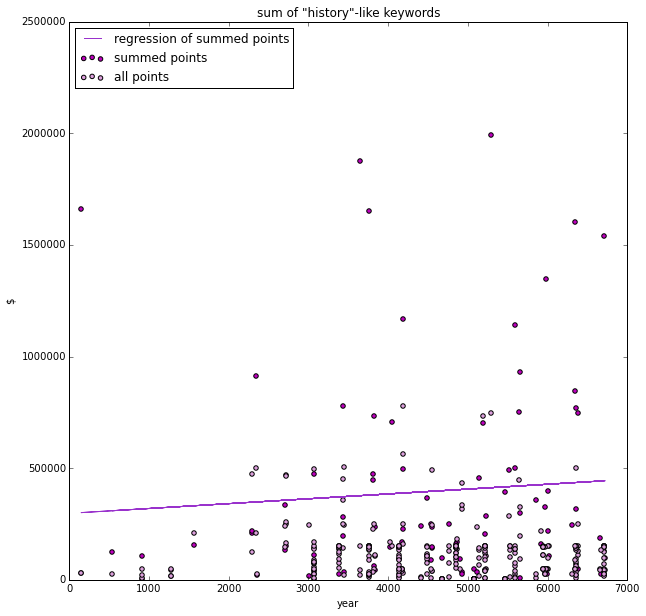

In [38]:
xH1 = np.array(list(set(d_temp.date_delta))).reshape(88,1)
yH1 = np.array(historSum)

rgrH1 = rgr
rgrH1.fit(xH1, yH1)

print("History-sum coefficient {}".format(rgrH1.coef_))
print("History-sum intercept {}".format(rgrH1.intercept_))


plt.figure(figsize = (10,10))
plt.scatter(xH1 ,yH1, c='m',label = "summed points")
plt.scatter(xH2, yH, c='plum', label = "all points")
plt.plot(xH1, rgrH1.predict(xH1), c = 'darkorchid', label = "regression of summed points")
plt.xlabel('year')
plt.ylabel('$')
plt.title('sum of "history"-like keywords')
plt.xlim(xmin = 0, xmax = 7000)
plt.legend(loc='upper left')
plt.ylim(ymin = 0, ymax = 2.5E6)


###..."education"

In [41]:
educatDum = []

for f in d.titleList:
    if re.search("educat", str(f)):
        educatDum.append(1)
    elif re.search("Educat", str(f)):
        educatDum.append(1)
    else:
        educatDum.append(0)

print len(educatDum), set(educatDum)

13594 set([0, 1])


In [43]:
d3 = d
d3['educat'] = educatDum

d3 = d3[~pd.isnull(d3.date_asTime)]

print(len(d), len(d3))

(13594, 13581)


In [46]:
d_temp = d3[(d3.educat == 1)][['date_asTime', 'date_delta', 'totAward_float']].sort(['date_asTime'])
dateSet = list(set(d_temp['date_asTime']))

educatSum = []

for i in dateSet:
    educatSum.append(sum(d_temp[(d_temp.date_asTime == i)]['totAward_float']))

In [47]:
print(len(d3[d3.educat ==1]),len(educatSum))

(313, 79)


educate-sum coefficient [ 56.58696295]
educate-sum intercept 718043.399321


(0, 8000000.0)

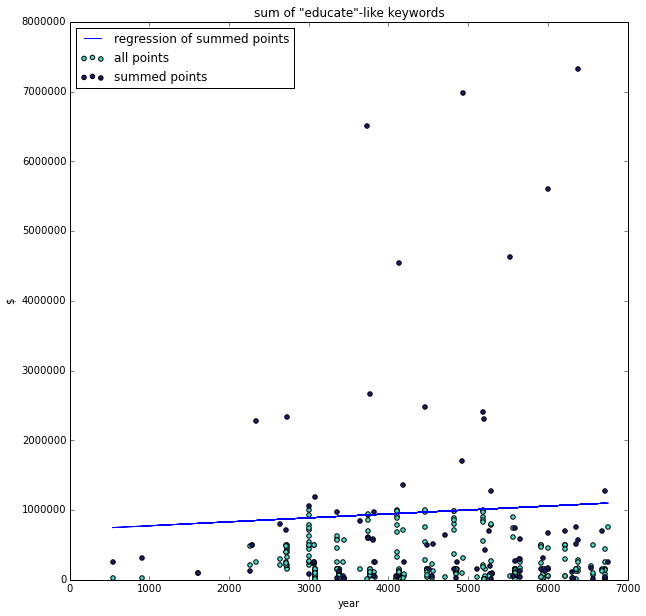

In [51]:
xE = (d3[(d3.educat==1)].date_asTime).reshape(313, 1)
xE2 = (d3[(d3.educat==1)].date_delta).reshape(313, 1)  #for later
yE = (d3[(d3.educat==1)].totAward_float).reshape(313, 1)


xE1 = np.array(list(set(d_temp.date_delta))).reshape(79,1)
yE1 = np.array(educatSum)

rgrE1 = rgr
rgrE1.fit(xE1, yE1)

print("educate-sum coefficient {}".format(rgrE1.coef_))
print("educate-sum intercept {}".format(rgrE1.intercept_))


plt.figure(figsize = (10,10))

plt.scatter(xE2, yE, c='turquoise', label = "all points")
plt.scatter(xE1 ,yE1, c='midnightblue',label = "summed points")
plt.plot(xE1, rgrE1.predict(xE1), c = 'b', label = "regression of summed points")

plt.xlabel('year')
plt.ylabel('$')
plt.title('sum of "educate"-like keywords')
plt.xlim(xmin = 0, xmax = 7000)
plt.legend(loc='upper left')
plt.ylim(ymin = 0, ymax = 8E6)


###..."data"

In [52]:
dataDum = []

for f in d.titleList:
    if re.search("data", str(f)):
        dataDum.append(1)
    elif re.search("Data", str(f)):
        dataDum.append(1)
    else:
        dataDum.append(0)

print len(dataDum), set(dataDum)

13594 set([0, 1])


In [53]:
d2 = d
d2['data'] = dataDum

d2 = d2[~pd.isnull(d2.date_asTime)]

print(len(d), len(d2))

(13594, 13581)


In [54]:
d_temp = d2[(d2.data == 1)][['date_asTime', 'date_delta', 'totAward_float']].sort(['date_asTime'])
dateSet = list(set(d_temp['date_asTime']))

dataSum = []

for i in dateSet:
    dataSum.append(sum(d_temp[(d_temp.date_asTime == i)]['totAward_float']))

In [55]:
print(len(d2[d2.data ==1]),len(dataSum))

(117, 52)


data-sum coefficient [ 49.05656834]
data-sum intercept 211644.578635
2015 predicted spending [ 559946.21383885]
2020 predicted spending [ 653153.69368225]


(0, 1600000.0)

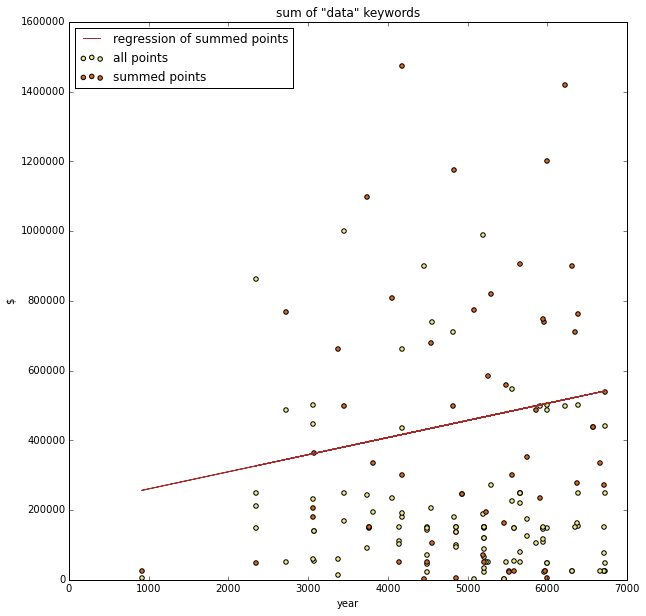

In [68]:
#xE = (d2[(d2.educat==1)].date_asTime).reshape(117, 1)
xD = (d2[(d2.data==1)].date_delta).reshape(117, 1)
yD = (d2[(d2.data==1)].totAward_float).reshape(117, 1)


xD1 = np.array(list(set(d_temp.date_delta))).reshape(52,1)
yD1 = np.array(dataSum)

rgrD1 = rgr
rgrD1.fit(xD1, yD1)

print("data-sum coefficient {}".format(rgrD1.coef_))
print("data-sum intercept {}".format(rgrD1.intercept_))
print("2015 predicted spending {}".format(rgrD1.predict(7100)))
print("2020 predicted spending {}".format(rgrD1.predict(9000)))


plt.figure(figsize = (10,10))

plt.scatter(xD, yD, c='khaki', label = "all points")
plt.scatter(xD1 ,yD1, c='chocolate',label = "summed points")
plt.plot(xD1, rgrD1.predict(xD1), c = 'brown', label = "regression of summed points")

plt.xlabel('year')
plt.ylabel('$')
plt.title('sum of "data" keywords')
plt.xlim(xmin = 0, xmax = 7000)
plt.legend(loc='upper left')
plt.ylim(ymin = 0, ymax = 1.6E6)


###..."science"

In [69]:
sciDum = []

for f in d.titleList:
    if re.search("scien", str(f)):
        sciDum.append(1)
    elif re.search("Scien", str(f)):
        sciDum.append(1)
    else:
        sciDum.append(0)

print len(sciDum), set(sciDum)

13594 set([0, 1])


In [70]:
d2 = d
d2['sci'] = sciDum

d2 = d2[~pd.isnull(d2.date_asTime)]

print(len(d), len(d2))

(13594, 13581)


In [71]:
d_temp = d2[(d2.sci == 1)][['date_asTime', 'date_delta', 'totAward_float']].sort(['date_asTime'])
dateSet = list(set(d_temp['date_asTime']))

sciSum = []

for i in dateSet:
    sciSum.append(sum(d_temp[(d_temp.date_asTime == i)]['totAward_float']))

In [73]:
print(len(d2[d2.sci ==1]),len(sciSum))

(165, 65)


data-sum coefficient [-37.68590287]
data-sum intercept 737739.932652
2015 predicted spending [ 470170.02230563]
2020 predicted spending [ 398566.80686083]


(0, 3000000.0)

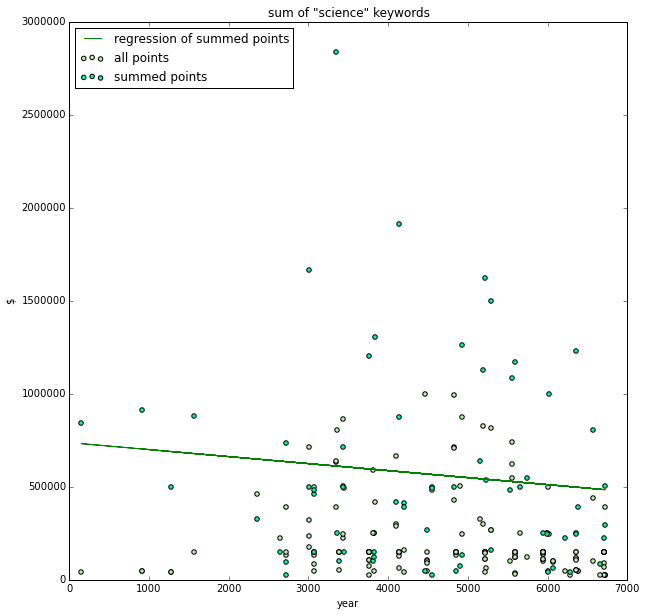

In [75]:
xS = (d2[(d2.sci==1)].date_delta).reshape(165, 1)
yS = (d2[(d2.sci==1)].totAward_float).reshape(165, 1)


xS1 = np.array(list(set(d_temp.date_delta))).reshape(65,1)
yS1 = np.array(sciSum)

rgrS = rgr
rgrS.fit(xS1, yS1)

print("data-sum coefficient {}".format(rgrS.coef_))
print("data-sum intercept {}".format(rgrS.intercept_))
print("2015 predicted spending {}".format(rgrS.predict(7100)))
print("2020 predicted spending {}".format(rgrS.predict(9000)))


plt.figure(figsize = (10,10))

plt.scatter(xS, yS, c='lightsage', label = "all points")
plt.scatter(xS1 ,yS1, c='mediumspringgreen',label = "summed points")
plt.plot(xS1, rgrS.predict(xS1), c = 'g', label = "regression of summed points")

plt.xlabel('year')
plt.ylabel('$')
plt.title('sum of "science" keywords')
plt.xlim(xmin = 0, xmax = 7000)
plt.legend(loc='upper left')
plt.ylim(ymin = 0, ymax = 3E6)
